# Part 1: Data from Raw to Ready {-}

Data rarely arrive to us in a form such that they are ready for
formal analysis. Typically, steps of preprocessing, cleaning,
checking, etc. are required before we have what we can call
**ready data**.

You will note that I avoid using the term **clean data**, as this
can imply a complete lack of issues in the data set. Completely
"clean" data is not realistic, and should not be expected. The
best we can hope is that a data set is sufficiently processed
to minimize any biases that may result from errors in the data set.

Ultimately, this process is quite situation-specific. We will present
some key concepts and stress the importance of taking this step, but
each data set will present unique challenges. This topic will be
revisited throughout the course as we encounter new data sets.

Our discussion will initially focus on data sets that are naturally
represented in a **flat** or **spreadsheet** form.
Each column contains a different **variable** and each
row gives one **instance** or **case**.

**Exercise:** Give examples of cases and associated variables in
data sets typically encountered in finance.

\answerlines{5}

\newpage

When is a data set "ready?"

1. Each variable is properly named.
2. Each variable is understood.
3. Each variable is represented in its appropriate **form**.
4. Each variable has internal consistency, i.e., values have the same interpretation across all
cases.
5. The source of any extreme values (outliers) is noted, and corrected as needed.
6. The source of any missing values is noted.

## Example Data Set {-}

First, we will read in a data set for use in some
subsequent examples.

Visit the website

__[https://bit.ly/31QyYjK](https://www.sec.gov/opa/data/market-structure/marketstructuredownloadshtml-by_security.html)__

and download the data from the first quarter of 2017. Create a directory
for working on these examples, and place this file in that directory.

These data come from the U.S. Securities and Exchange Commission
respository on market structure. This data set contains daily
characteristics of a range of market variables over 5000 equities and
ETFs, accumulated over several exchanges. See also

__[https://www.sec.gov/marketstructure/mar_methodology.html](https://www.sec.gov/marketstructure/mar_methodology.html)__

\newpage

Be sure that the working directory is correctly set in Python (use `chdir` from `os` if necessary)
and use `read_csv` from `pandas`:

In [1]:
from os import chdir,getcwd
getcwd()

'/Users/chadschafer/Teaching/MSCF/DScourses/LectureNotes/2020/Part1_UnderstandingDataSets'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fulldata = pd.read_csv("q1_2017_all.csv")

**Exercise:** Visually inspect the data set and comment.

\answerlines{7}

In [3]:
fulldata

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
0,20170103,Stock,A,10.0,5.0,1.0,8.0,1007.029,26747.828,1146.0,11498.0,136.061,1143.090,153793.0,7666.0,2953.0,8566.0,111.009,741.996
1,20170103,Stock,AA,9.0,9.0,5.0,7.0,1231.781,29078.922,1524.0,13843.0,269.649,1498.692,148177.0,9374.0,3527.0,10656.0,124.118,1055.981
2,20170103,Stock,AAC,3.0,8.0,8.0,3.0,76.512,4017.455,432.0,1218.0,39.986,116.498,11758.0,535.0,295.0,926.0,10.992,82.820
3,20170103,Stock,AAL,10.0,9.0,4.0,8.0,3902.600,68480.684,3657.0,40826.0,436.702,4339.202,423057.0,37170.0,11078.0,40827.0,446.174,4339.302
4,20170103,Stock,AAMC,2.0,3.0,9.0,8.0,2.211,169.539,2.0,19.0,0.105,2.316,1198.0,11.0,4.0,11.0,0.096,1.791
5,20170103,Stock,AAME,2.0,1.0,9.0,2.0,0.949,69.485,3.0,8.0,0.300,1.249,265.0,5.0,1.0,8.0,0.075,1.249
6,20170103,Stock,AAN,8.0,8.0,4.0,7.0,473.313,14720.170,355.0,6483.0,37.030,510.343,89796.0,4893.0,2376.0,5112.0,77.653,363.667
7,20170103,Stock,AAOI,5.0,9.0,7.0,6.0,107.999,4413.842,239.0,1583.0,19.936,127.935,40075.0,1344.0,707.0,1583.0,25.074,127.935
8,20170103,Stock,AAON,7.0,3.0,5.0,7.0,85.253,2295.707,41.0,1153.0,2.828,87.981,17995.0,1113.0,516.0,1154.0,18.368,88.081
9,20170103,Stock,AAP,10.0,8.0,2.0,10.0,367.591,22608.724,1387.0,6569.0,108.330,475.921,98535.0,4061.0,2585.0,5142.0,87.687,360.097


Background on the data can be found in the associated `README` file, available on Canvas in the "Data Sets" folder in the "Files" page. We will reference portions of it below.

\newpage

## Understanding the Variables {-}

Whenever a new data set is encountered, one should fully understand its variables. Specific questions to address for each variable:

1. Describe the information that is stored in this column.

2. What type of variable is it? (Timestamp, categorical, ordinal, ratio, other?) Be sure that Python represents the variable correctly.

3. Are there any missing values? What is the source of the missingness?

4. Are there any extreme/inappropriate values? What is the source of the extreme value?

**Exercise:** Describe the distinctions between the variables which are on the categorical, ordinal, and ratio scales.

\answerlines{10}

## Column 1: Date {-}

The first column in `fulldata` is a date stamp for the observation. Python/Pandas has special functions
for handling dates which will prove useful later, including when working with time series.

After reading the file, the dates are simply integers.

In [4]:
print(fulldata['Date'][0])

20170103


The function `to_datetime` in Pandas will make the conversion. The list on the following page shows all of the formatting characters. 

In [5]:
fulldata['Date'] = \
  pd.to_datetime(fulldata['Date'], \
                 format='%Y%m%d')

These strings can also be used in formatting output using `strftime`.

In [6]:
print(fulldata.Date[0].strftime('%m/%y'))
print(fulldata.Date[0].strftime('%A, %B %d'))

01/17
Tuesday, January 03


\newpage

\large (From `https://stackabuse.com/how-to-format-dates-in-python/`.) \Large

\vspace{-.2in}
* `%b`: Returns the first three characters of the month name.
* `%d`: Returns day of the month, from 1 to 31.
* `%Y`: Returns the year in four-digit format.
* `%H`: Returns the hour.
* `%M`: Returns the minute, from 00 to 59.
* `%S`: Returns the second, from 00 to 59.
* `%a`: Returns the first three characters of the weekday, e.g. Wed.
* `%A`: Returns the full name of the weekday, e.g. Wednesday.
* `%B`: Returns the full name of the month, e.g. September.
* `%w`: Returns the weekday as a number, from 0 to 6, with Sunday as 0.
* `%m`: Returns the month as a number, from 01 to 12.
* `%p`: Returns AM/PM for time.
* `%y`: Returns the year in two-digit format, that is, without the century.
* `%f`: Returns microsecond from 000000 to 999999.
* `%Z`: Returns the timezone.
* `%z`: Returns UTC offset.
* `%j`: Returns the number of the day in the year, from 001 to 366.
* `%W`: Returns the week number of the year, from 00 to 53, with Monday being counted as the first day of the week.
* `%U`: Returns the week number of the year, from 00 to 53, with Sunday counted as the first day of each week.
* `%c`: Returns the local date and time version.
* `%x`: Returns the local version of date.
* `%X`: Returns the local version of time.

\newpage
## Columns 2 and 3: Security and Ticker {-}

The variables `Security` and `Ticker` are currently of type `object`, which is how Pandas stores strings.



In [7]:
fulldata[['Security','Ticker']].dtypes

Security    object
Ticker      object
dtype: object

Both of these variables are clearly categorical, and lacking in a natural ordering to the levels. The conversion to the appropriate data type is shown below. (By default, the categories are taken to be unordered.)

In [8]:
fulldata['Security'] = \
  fulldata['Security'].astype('category')
fulldata['Ticker'] = \
  fulldata['Ticker'].astype('category')

fulldata[['Security','Ticker']].dtypes

Security    category
Ticker      category
dtype: object

\newpage

We can see that there are two possible levels for `Security`, `Stock` or `ETF` (Exchange Traded Fund). There are over 5,000 symbols under consideration.

In [9]:
print(fulldata['Security'].unique())
print(len(fulldata['Ticker'].unique()))

[Stock, ETF]
Categories (2, object): [Stock, ETF]
5338


**Exercise:** How many of the different ticker symbols are ETFs?

\answerlines{5}

In [10]:
fulldata[fulldata["Security"]=="ETF"]
fulldata[fulldata["Security"]=="ETF"]["Ticker"]
fulldata[fulldata["Security"]=="ETF"]["Ticker"].unique()
len(fulldata[fulldata["Security"]=="ETF"]["Ticker"].unique())

1642

\newpage

**Exercise:** Execute the commands below, and discuss what you find.

In [11]:
len(fulldata['Date'].unique())

62

In [12]:
fulldata.groupby('Ticker')['Date'].count().value_counts().sort_index()
fulldata.groupby('Ticker').count()

,Date,Security,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
Ticker,,,,,,,,,,,,,,,,,,
A,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AA,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAC,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AADR,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAL,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAMC,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAME,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAN,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
AAOI,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62


In [13]:
fulldata.groupby('Ticker')['Date'].\
  count().idxmax()

'TPYP'

In [14]:
fulldata[fulldata.duplicated(subset=('Date','Ticker'),keep=False)]

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
72688,2017-01-23,ETF,JUNE,NaN,NaN,4.0,NaN,3.09,22038.008,6.0,12.0,1.00,4.09,26860.0,6.0,2.0,12.0,0.154,4.09
72689,2017-01-23,ETF,JUNE,1.0,4.0,4.0,2.0,3.09,22038.008,6.0,12.0,1.00,4.09,26860.0,6.0,2.0,12.0,0.154,4.09
283006,2017-03-21,ETF,TPYP,NaN,NaN,3.0,NaN,15.05,27806.710,24.0,56.0,3.25,18.30,13836.0,32.0,2.0,56.0,0.050,18.30
283007,2017-03-21,ETF,TPYP,2.0,2.0,3.0,1.0,15.05,27806.710,24.0,56.0,3.25,18.30,13836.0,32.0,2.0,56.0,0.050,18.30
309221,2017-03-28,ETF,TPYP,NaN,NaN,2.0,NaN,11.55,12542.754,4.0,28.0,0.60,12.15,7102.0,24.0,0.0,28.0,0.000,12.15
309222,2017-03-28,ETF,TPYP,2.0,2.0,2.0,1.0,11.55,12542.754,4.0,28.0,0.60,12.15,7102.0,24.0,0.0,28.0,0.000,12.15


\answerlines{10}

We can remove the duplicated rows using the following command. 

In [15]:
fulldata = fulldata.drop_duplicates(subset=('Date','Ticker'), keep='last')

\newpage
## Columns 4 through 7: Rank Variables {-}

The next four columns provide ranks of the stocks/ETFs
with respect to key attributes of Market Capitalization,
Turnover, Volatility, and Price.

In general, we would prefer to start with data in its
most "raw" format, and one could construct variables such
as these from that data. Alas, we are often left to work
with what is avaiable.

**Exercise:** Inspect the output of

In [16]:
fulldata.groupby(by=['Date','Security',\
    'VolatilityRank'])['Security'].count()

Date        Security  VolatilityRank
2017-01-03  ETF       1.0               403
                      2.0               403
                      3.0               403
                      4.0               403
            Stock     1.0               363
                      2.0               364
                      3.0               363
                      4.0               364
                      5.0               363
                      6.0               364
                      7.0               363
                      8.0               364
                      9.0               363
                      10.0              364
2017-01-04  ETF       1.0               403
                      2.0               403
                      3.0               403
                      4.0               403
            Stock     1.0               364
                      2.0               364
                      3.0               363
                      4.0              

In [17]:
fulldata.groupby(by=['Security','Ticker',\
    'VolatilityRank'])['VolatilityRank'].count()

Security  Ticker  VolatilityRank
ETF       AADR    3.0               12
                  4.0               50
          AAXJ    1.0               17
                  2.0               43
                  3.0                2
          ACIM    1.0               18
                  2.0               18
                  3.0               16
                  4.0               10
          ACTX    1.0               11
                  2.0               35
                  3.0               15
                  4.0                1
          ACWF    1.0                4
                  2.0               18
                  3.0               14
                  4.0               26
          ACWI    1.0               33
                  2.0               29
          ACWV    1.0               61
                  2.0                1
          ACWX    1.0               30
                  2.0               31
                  3.0                1
          ADRA    1.0          

What does this tell us about the structure of these variables? Why should we be very careful with these variables?

\answerlines{8}

\newpage

We change these into **ordered categorical variables** to reflect their ordinal nature.

In [18]:
fulldata = fulldata.copy()
fulldata['McapRank'] = fulldata['McapRank'].\
  astype('category').cat.as_ordered()
fulldata['TurnRank'] = fulldata['TurnRank'].\
  astype('category').cat.as_ordered()
fulldata['VolatilityRank'] = \
  fulldata['VolatilityRank'].\
    astype('category').cat.as_ordered()
fulldata['PriceRank'] = fulldata['PriceRank'].\
  astype('category').cat.as_ordered()

\newpage
## Columns 8 through 19: The Count Variables {-}

The remaining column in the data set consist of trade and
share counts of different types.

Note that some of the volume counts are reported in 1000's
of shares, hence there are non-integer values among the counts.

**Exercise:** Execute the command below and comment on the results. It is especially important to focus on extreme or impossible values.

In [19]:
fulldata.describe()

,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
count,325159.000000,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000,3.251590e+05,325159.000000,325159.000000,325159.000000,325159.000000,325159.000000
mean,431.764045,3.574691e+04,454.364775,3475.798991,66.907770,498.040846,7.357938e+04,2708.215399,916.053728,3114.817825,32.492184,422.776768
std,1740.908441,1.574917e+05,1203.344021,8923.091486,244.623292,1958.484971,1.968162e+05,7320.665749,1960.216622,8277.276242,71.497648,1753.085228
min,0.000000,0.000000e+00,-143.000000,0.000000,-7903.643000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.459000,8.845240e+02,10.000000,41.000000,1.150000,5.636000,3.126000e+03,23.000000,8.000000,39.000000,0.280000,5.314000
50%,44.573000,4.002995e+03,75.000000,501.000000,8.740000,55.306000,1.558300e+04,377.000000,154.000000,464.000000,5.254000,49.944000
75%,254.405500,1.558087e+04,370.000000,2846.000000,44.015500,301.585000,6.011250e+04,2186.500000,887.000000,2558.000000,31.083000,260.177000
max,119014.064000,7.293901e+06,89335.000000,533874.000000,14821.940000,133714.593000,7.607714e+06,383222.000000,130106.000000,462414.000000,3728.885000,108034.795000


In [20]:
fulldata[fulldata["Hidden"]<0]

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
472,2017-01-03,Stock,BRK.A,10.0,1.0,10.0,10.0,0.241,150.520,-17.0,245.0,-0.017,0.247,106557.0,212.0,0.0,218.0,0.000,0.219
5718,2017-01-04,Stock,BRK.A,10.0,1.0,1.0,10.0,0.132,132.361,-36.0,140.0,-0.044,0.148,93211.0,66.0,0.0,82.0,0.000,0.082
6645,2017-01-04,Stock,GLOW,1.0,1.0,10.0,1.0,2.403,625.217,-3.0,11.0,-0.880,2.503,253.0,4.0,0.0,5.0,0.000,0.700
10967,2017-01-05,Stock,BRK.A,10.0,1.0,1.0,10.0,0.113,149.920,-23.0,113.0,-0.031,0.118,105992.0,71.0,0.0,76.0,0.000,0.076
16216,2017-01-06,Stock,BRK.A,10.0,1.0,1.0,10.0,0.077,133.671,-10.0,77.0,-0.018,0.081,98153.0,51.0,0.0,55.0,0.000,0.055
21129,2017-01-09,Stock,ALN,1.0,1.0,8.0,1.0,0.625,68.496,-1.0,6.0,-0.025,0.625,260.0,4.0,0.0,4.0,0.000,0.500
21458,2017-01-09,Stock,BRK.A,10.0,1.0,10.0,10.0,0.094,134.619,-17.0,92.0,-0.020,0.102,108961.0,55.0,0.0,63.0,0.000,0.063
26699,2017-01-10,Stock,BRK.A,10.0,1.0,1.0,10.0,0.099,140.227,-15.0,99.0,-0.018,0.100,110300.0,83.0,0.0,84.0,0.000,0.084
31941,2017-01-11,Stock,BRK.A,10.0,1.0,10.0,10.0,0.122,186.515,-13.0,120.0,-0.017,0.133,145977.0,79.0,0.0,90.0,0.000,0.091
37182,2017-01-12,Stock,BRK.A,10.0,1.0,10.0,10.0,0.127,196.372,-20.0,121.0,-0.021,0.130,156623.0,88.0,0.0,91.0,0.000,0.095


\answerlines{13}

\newpage

Of course, graphical tools are useful for understanding the
properties of variables. This topic will be covered more
fully later, but here we consider a classic
approach: the **boxplot**:

/Users/chadschafer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/chadschafer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


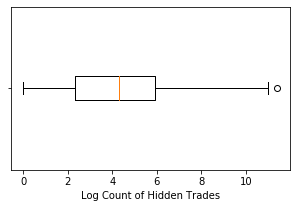

In [22]:
plt.figure(figsize=(5,3))
plt.boxplot(np.log(fulldata['Hidden'])\
    .dropna(),labels=[""], vert=False)
plt.xlabel("Log Count of Hidden Trades")
plt.show()

\newpage

The "box" of the plot extends from the 25th to the 75th percentile
of the data, while the solid line in the middle of the box is at the
median. The two "arms" extend to the minimum and maximum value,
**except** that any value labelled an **outlier** is
plotted separately.

**Exercise:** How is an outlier defined in this case?

\answerlines{5}

**Exercise:** Why was the logarithm of the variable utilized? What
issues did that create?

\answerlines{10}

In [24]:
fulldata.loc[fulldata["Hidden"].idxmax()]

Date                        2017-03-02 00:00:00
Security                                  Stock
Ticker                                     SNAP
McapRank                                     10
TurnRank                                     10
VolatilityRank                               10
PriceRank                                     6
LitVol('000)                            96646.4
OrderVol('000)                      1.08587e+06
Hidden                                    89335
TradesForHidden                          533874
HiddenVol('000)                        -7903.64
TradeVolForHidden('000)                  119433
Cancels                             3.66473e+06
LitTrades                                383222
OddLots                                  130106
TradesForOddLots                         462414
OddLotVol('000)                         3728.89
TradeVolForOddLots('000)                81060.1
Name: 212803, dtype: object

\newpage

**Exercise:** Consider the outlier in the previous plot. Is this observation
also extreme in the other variables? Can you find the source of this behavior?

\answerlines{8}

**Exercise:** Parse the syntax, and comment on the output, of the following command.

In [25]:
fulldata.iloc[:, 7:19].apply(lambda x: x.idxmax())

LitVol('000)                278303
OrderVol('000)              298903
Hidden                      212803
TradesForHidden             212803
HiddenVol('000)             278303
TradeVolForHidden('000)     278303
Cancels                     282946
LitTrades                   212803
OddLots                     212803
TradesForOddLots            212803
OddLotVol('000)             212803
TradeVolForOddLots('000)    283173
dtype: int64

\answerlines{7}

\newpage

## Missing Data {-}

Most data sets contain some amount of missing data, for
many reasons.

As a first step, it is important to recognize how your data set
represents missing values, so that they are read in properly.

In a `.csv` file such as that we are using here, it is common to
simply have blank values to indiciate missingness, i.e., there are
consecutive commas without a value between.

The `read_csv()` function has an argument `na_values` which allows
the user to specify strings that should be considered as missing
values. By default, the following are converted into `NaN`:
`‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’`.
**Be careful:** It is not unusual for
data sets to use numbers such as `-999` to indicate a missing value.

Pandas uses `NaN` to represent missing values.


\newpage

**Exercise:** Execute the following commands and discuss the results

In [29]:
np.where(fulldata.isnull())[0]

array([ 21303,  21303,  21303,  48530,  48530,  48530,  59699,  59699,
        59699,  65651,  65651,  65651,  70184,  70184,  70184,  76133,
        76133,  76133,  80663,  80663,  80663,  91149,  91149,  91149,
        96395,  96395,  96395, 106892, 106892, 106892, 112141, 112141,
       112141, 117389, 117389, 117389, 122638, 122638, 122638, 123826,
       123826, 123826, 127887, 127887, 127887, 133135, 133135, 133135,
       138382, 138382, 138382, 143342, 143342, 143342, 143629, 143629,
       143629, 148877, 148877, 148877, 154125, 154125, 154125, 159374,
       159374, 159374, 162846, 162846, 162846, 169874, 169874, 169874,
       170149, 170149, 170149, 175123, 175123, 175123, 180371, 180371,
       180371, 183996, 183996, 183996, 185617, 185617, 185617, 189839,
       189839, 189839, 190588, 190588, 190588, 190862, 190862, 190862,
       195164, 195164, 195164, 196104, 196104, 196104, 205261, 205261,
       205261, 205342, 205342, 205342, 208068, 208068, 208068, 210210,
      

In [15]:
len(np.unique(np.where(fulldata.isnull())[0]))

77

\answerlines{15}

\newpage

The package `seaborn` has a function `heatmap()` that can be useful for inspecting any patterns in the missingness.

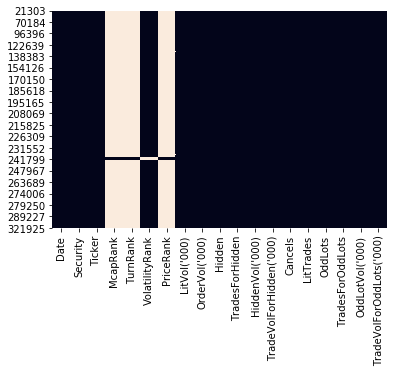

In [16]:
import seaborn as sns
sns.heatmap(fulldata.iloc[np.unique\
    (np.where(fulldata.isnull())[0]),:]\
    .isnull(),cbar=False)
None

The `dropna` function will remove any row from the data frame with at least one `NaN` value.

In [17]:
fulldatacomplete = fulldata.dropna()
len(np.unique(np.where(fulldatacomplete.\
        isnull())[0]))

0

Working only with such data is referred to as **complete case analysis**.

**Exercise:** Discuss potential drawbacks to complete case analyses.

\answerlines{14}

**Exercise:** Consider the output of the following and comment on any features of the incomplete cases that may be releveant.

In [30]:
fulldata.iloc[np.unique(np.where(fulldata.isnull())[0]),:]

,Date,Security,Ticker,McapRank,TurnRank,VolatilityRank,PriceRank,LitVol('000),OrderVol('000),Hidden,TradesForHidden,HiddenVol('000),TradeVolForHidden('000),Cancels,LitTrades,OddLots,TradesForOddLots,OddLotVol('000),TradeVolForOddLots('000)
21303,2017-01-09,Stock,AXAR,NaN,NaN,1.0,NaN,0.000,21.500,0.0,0.0,0.000,0.000,85.0,0.0,0.0,0.0,0.000,0.000
48530,2017-01-17,Stock,FTI,NaN,NaN,4.0,NaN,11267.122,176892.554,10120.0,75314.0,2314.994,13504.012,617632.0,54296.0,12235.0,63096.0,471.916,8368.972
59699,2017-01-19,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
65651,2017-01-20,Stock,RDIB,NaN,NaN,1.0,NaN,0.000,1.223,0.0,0.0,0.000,0.000,5.0,0.0,0.0,0.0,0.000,0.000
70184,2017-01-23,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
76134,2017-01-24,Stock,RDIB,NaN,NaN,1.0,NaN,0.000,0.210,0.0,0.0,0.000,0.000,1.0,0.0,0.0,0.0,0.000,0.000
80664,2017-01-25,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.275,0.0,0.0,0.000,0.000,4.0,0.0,0.0,0.0,0.000,0.000
91150,2017-01-27,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000
96396,2017-01-30,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.400,0.0,0.0,0.000,0.000,3.0,0.0,0.0,0.0,0.000,0.000
106893,2017-02-01,Stock,MACQ,NaN,NaN,1.0,NaN,0.000,0.075,0.0,0.0,0.000,0.000,2.0,0.0,0.0,0.0,0.000,0.000


\answerlines{15}